# Exploring Weather Trends

The goal will be to create a visualization and prepare a write up describing the similarities and differences between global temperature trends and temperature trends in the closest big city to where you live. 

Let's do the imports and display the head of each file.

### Data Preparation

#### Imports

In [223]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab
import seaborn as sns


#### Prepare files to be used on notebook

In [80]:
city_temp = pd.read_csv('city_data.csv')
city_temp.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [81]:
cities = pd.read_csv('city_list.csv')
cities.head()

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey


In [82]:
global_temp = pd.read_csv('global_data.csv')
global_temp.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


### Temperature plots

#### Global temperature change in time

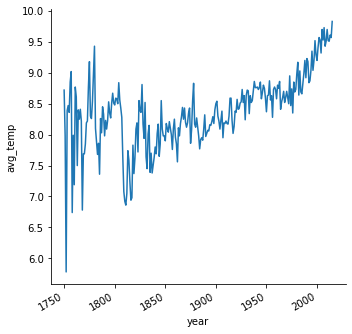

In [90]:
glob = sns.relplot(x="year", y="avg_temp", kind="line", data=global_temp)
glob.fig.autofmt_xdate()

#### London temperature change in time

In [84]:
my_city = city_temp.loc[(city_temp['city'] == 'London') & (city_temp['country'] == 'United Kingdom')]


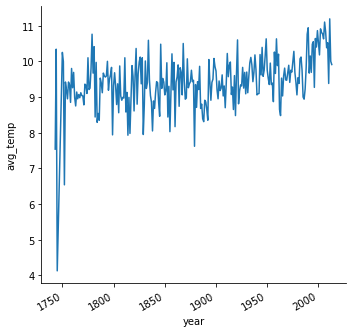

In [102]:
g = sns.relplot(x="year", y="avg_temp", kind="line", data=my_city)
g.fig.autofmt_xdate()

In [86]:
my_city.head()

,year,city,country,avg_temp
36012,1743,London,United Kingdom,7.54
36013,1744,London,United Kingdom,10.34
36014,1745,London,United Kingdom,4.13
36015,1746,London,United Kingdom,NaN
36016,1747,London,United Kingdom,NaN


In [87]:
global_temp.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


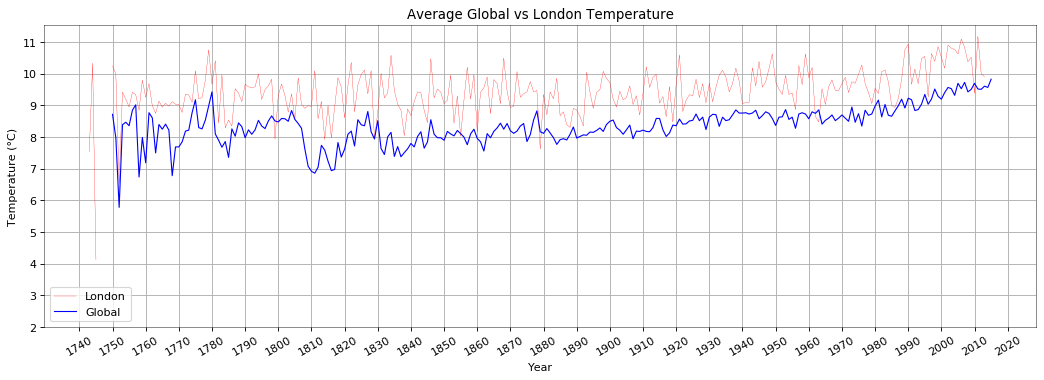

In [232]:
#Draw plot
plt.figure(figsize=(16,5), dpi= 80)
a = plt.plot( 'year', 'avg_temp', data=my_city, marker='', color='red', linewidth=0.25, label='London')
b = plt.plot( 'year', 'avg_temp', data=global_temp, marker='', color='blue', linewidth=1, label='Global')

#Improve plotting area
plt.title('Average Global vs London Temperature')
plt.ylabel('Temperature (°C)')
plt.xlabel('Year')

plt.yticks(np.arange(2, 12, step=1))
plt.xticks(np.arange(1740, 2025, step=10), rotation=30)
pylab.legend()
plt.grid(True)



#Improve borders
plt.gca().spines["top"].set_alpha(0.5)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.5)    
plt.gca().spines["left"].set_alpha(0.5)   
plt.show()



### Moving averages

In [241]:
global_temp['moving_average'] = global_temp['avg_temp'].rolling(window=5).mean()
global_temp.head()

,year,avg_temp,moving_average
0,1750,8.72,NaN
1,1751,7.98,NaN
2,1752,5.78,NaN
3,1753,8.39,NaN
4,1754,8.47,7.868


In [242]:
city_temp['moving_average'] = city_temp['avg_temp'].rolling(window=5).mean()
my_city = city_temp.loc[(city_temp['city'] == 'London') & (city_temp['country'] == 'United Kingdom')]
my_city.head()

,year,city,country,avg_temp,moving_average
36012,1743,London,United Kingdom,7.54,9.390
36013,1744,London,United Kingdom,10.34,9.564
36014,1745,London,United Kingdom,4.13,8.526
36015,1746,London,United Kingdom,NaN,NaN
36016,1747,London,United Kingdom,NaN,NaN


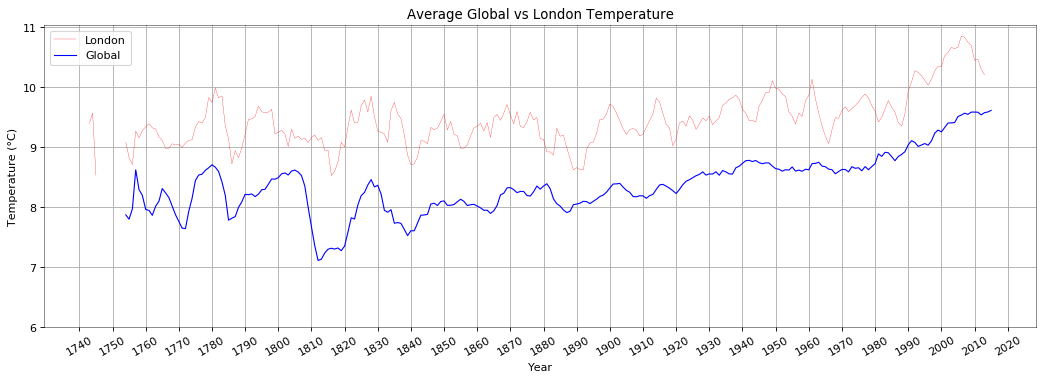

In [247]:
#Draw plot
plt.figure(figsize=(16,5), dpi= 80)
a = plt.plot( 'year', 'moving_average', data=my_city, marker='', color='red', linewidth=0.25, label='London')
b = plt.plot( 'year', 'moving_average', data=global_temp, marker='', color='blue', linewidth=1, label='Global')

#Improve plotting area
plt.title('Average Global vs London Temperature')
plt.ylabel('Temperature (°C)')
plt.xlabel('Year')

plt.yticks(np.arange(6, 12, step=1))
plt.xticks(np.arange(1740, 2025, step=10), rotation=30)
pylab.legend()
plt.grid(True)



#Improve borders
plt.gca().spines["top"].set_alpha(0.5)    
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["right"].set_alpha(0.5)    
plt.gca().spines["left"].set_alpha(0.5)   
plt.show()